In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  
import pandas as pd

# https://stackoverflow.com/questions/1094841/get-human-readable-version-of-file-size
def human_readable_size(size):
    for unit in ["B", "KB", "MB", "GB", "TB", "PB"]:
        if size < 1000.0 or unit == "PiB":
            break
        size /= 1000.0
    return f"{size:.2f} {unit}"

df = pd.read_json("results.json")
df = df.sort_values(by="len")

In [2]:
filenames = []
throughput = defaultdict(lambda: [])
runtimes = defaultdict(lambda: [])
for _, row in df.iterrows():
    size = human_readable_size(row["len"])
    filenames.append(f"{row["filename"][5:]}\n({size})")
    for j in range(len(row["benchmark_results"])):
        br = row["benchmark_results"][j]
        throughput[br["name"]].append(br["throughput_mb_per_sec"])
        runtimes[br["name"]].append(br["elapsed_seconds"])

sorted_throughput = []
for (k, v) in throughput.items():
    sorted_throughput.append((k, v))
sorted_throughput.sort(key=lambda v: max(v[1]))
sorted_throughput.reverse()

sorted_runtimes = []
for (k, v) in runtimes.items():
    sorted_runtimes.append((k, v))
sorted_runtimes.sort(key=lambda v: max(v[1]))
sorted_runtimes.reverse()

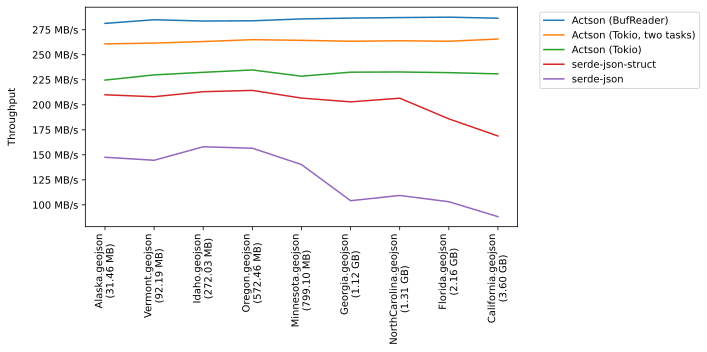

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
for (k, v) in sorted_throughput:
    ax.plot(filenames, v, label=k)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%i MB/s"))
ax.set_ylabel("Throughput", labelpad=15)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

fig.tight_layout()
fig.savefig("results-throughput.svg")

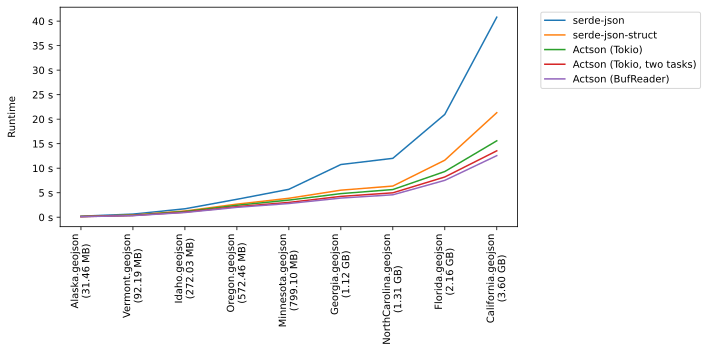

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
for (k, v) in sorted_runtimes:
    ax.plot(filenames, v, label=k)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("%i s"))
ax.set_ylabel("Runtime", labelpad=15)
ax.tick_params(axis='x', labelrotation=90)

ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

fig.tight_layout()
fig.savefig("results-runtime.svg")